In [125]:
import pandas as pd
import os
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [154]:
import pandas as pd

from pyabsa import ATEPCCheckpointManager

aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='multilingual-256-2')


def perform_inference(text):
    result = aspect_extractor.extract_aspect(inference_source=[text],
                                             pred_sentiment=True)

    result = pd.DataFrame({
        'aspect': result[0]['aspect'],
        'sentiment': result[0]['sentiment'],
        # 'probability': result[0]['probs'],
        'confidence': [round(x, 4) for x in result[0]['confidence']],
        'position': result[0]['position']
    })
    return result, '{}'.format(text)





Load aspect extractor from checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT
config: checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc.config
state_dict: checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc.state_dict
model: None
tokenizer: checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc.tokenizer


Some weights of the model checkpoint at microsoft/mdeberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.dense.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.classifier.weight', 'mask_predictions.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have 

In [155]:
text = "This McDonald's has gotten much better. Usually my order would be wrong every single time so I would not leave that window until I checked every single item. I only hit up fast food once a month or so and it needs to be worth it. Also the fries used to be cold and the cheese on the burger was never melted. Everything was just lukewarm. Now my order has been right a few times in a row and my food hot. Also, I love dining room. Usually you wouldn't find me actually inside a fast food joint but this place has nice flooring, stacked stone, lots of large windows and a flat screen TV usually on HLN. Sometimes its nice to sneak away for a quick weekend breakfast, you know, a little budget and time friendly mommy and me date."



In [156]:
res = perform_inference(text)

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: This McDonald ' s has gotten much better . Usually my order would be wrong every single time so I would not leave that window until I checked every single item . I only hit up fast food once a month or so and it needs to be worth it . Also the <fries:Negative Confidence:0.9426096081733704> used to be cold and the <cheese:Negative Confidence:0.58629310131073> on the burger was never melted . Everything was just lukewarm . Now my order has been right a few times in a row and my food hot . Also , I love dining room . Usually you wouldn ' t find me actually inside a fast food joint but this place has nice <flooring:Positive Confidence:0.9997575879096985> , stacked stone , lots of large windows and a flat screen TV usually on HLN . Sometimes its nice to sneak away for a quick weekend breakfast , you know , a little budget a

/Users/marikhomeriki/.pyenv/versions/3.10.6/envs/product_review_analysis/lib/python3.10/site-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:410: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = [float(x) for x in F.softmax(i_apc_logits).cpu().numpy().tolist()]


In [157]:
res[0]

,aspect,sentiment,confidence,position
0,fries,Negative,0.9426,[54]
1,cheese,Negative,0.5863,[61]
2,flooring,Positive,0.9998,[116]


In [158]:
df = pd.read_csv('/Users/marikhomeriki/code/marikhomeriki/product_review_analysis/temp_data/duck-and-waffle-london.csv', header = None)
df = df.rename({1: 'text'}, axis = 1)

In [159]:
df = df.dropna()

In [160]:
df = pd.DataFrame(df.text)

In [161]:
df

,text
1,The best food & service of our day. The mushro...
2,We are Californians in London for the first ti...
3,Don't trust the listed hours! Mother Mash clos...
4,Arrived 6pm and after waiting a considerable t...
5,Tucked away in Soho along a street of other ea...
6,First meal in London and knew I had to try ban...
7,We came here at around 6 pm but the place was ...
8,Perfect comfort food meal! Sausages were nicel...
9,"Omg! If you are in London, you have got to eat..."
10,We had to try Bangers and Mash while visiting ...


In [259]:
def get_aspect_dfs(data):
    dfs = []
    for row in data.iterrows():
        text = row[1][0]
        df = perform_inference(text)
        dfs.append(df)
    return dfs
        

In [260]:
def get_aspect_distribution(dataframes):
    aspects = {}
    sents = []
    for df in dataframes:
        for a, s in df[0].iterrows():
            word_all = s[0].split()
            word = word_all[0].lower()
            if aspects.get(word) is None:
                sents = []
                sents.append(s[1])
                aspects[word] = sents
            else:
                sents = aspects.get(word)
                sents.append(s[1])
                aspects[word] = sents
    return aspects
            


In [164]:
dfs = get_aspect_dfs(df)

/Users/marikhomeriki/.pyenv/versions/3.10.6/envs/product_review_analysis/lib/python3.10/site-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:410: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = [float(x) for x in F.softmax(i_apc_logits).cpu().numpy().tolist()]


The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: The best <food:Positive Confidence:0.999914288520813> & <service:Positive Confidence:0.9999076128005981> of our day . The mushroom & ale pie along with the apple & blackberry crumble with custard - beyond delish . <Service:Positive Confidence:0.9999016523361206> was amazing ! Cute <area:Positive Confidence:0.9998873472213745> - great people watching
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: We are Californians in London for the first time . We stopped here and we ' re helped and served by the cutest women . We weren ' t sure what to order so they filled us in on the popular choices . They were spot on and we loved the champ potatoes and 2 sausages . Then had dessert , the sticky toffee and cus

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: We had to try Bangers and Mash while visiting The Big Smoke so we Yelped it and found Mother Mash to be top rated for this dish . This place specializes in Bangers & Mash and they do a great job . My Vegan daughter had a delicious vegan take on this classic while I had the original . You get to choose your type of mash , main ( banger ) and then gravy . You can also have it in a pie form . It ' s very customizable . We added a side of Mushy Peas and Cheesy Cauliflower . The <dishes:Positive Confidence:0.7822072505950928> were very filling and we left there stuffed . We felt bad for the <waitress:Positive Confidence:0.957792341709137> as apparently the kitchen is downstairs and she has to go up and down stairs for every dish . They need a dumbwaiter there . Overall , great <food:Positive Confidence:0.9251585006713867> i

In [261]:
aspects = get_aspect_distribution(dfs)

In [196]:
aspects

{'food': ['Positive',
  'Positive',
  'Positive',
  'Positive',
  'Positive',
  'Positive'],
 'service': ['Positive',
  'Positive',
  'Negative',
  'Positive',
  'Positive',
  'Positive',
  'Positive'],
 'area': ['Positive'],
 'meal': ['Positive', 'Positive'],
 'waiting': ['Negative'],
 'tables': ['Neutral'],
 'mash': ['Positive', 'Positive'],
 'drink': ['Positive'],
 'place': ['Negative'],
 'sticky': ['Positive'],
 'desserts': ['Positive'],
 'ice': ['Positive'],
 'toffee': ['Positive'],
 'ginger': ['Positive'],
 'chocolate': ['Positive', 'Positive'],
 'apple': ['Positive'],
 'comfort': ['Positive'],
 'sausages': ['Positive'],
 'mashed': ['Positive', 'Positive'],
 'meat': ['Positive', 'Positive'],
 'filling': ['Positive'],
 'side': ['Positive'],
 'dishes': ['Positive'],
 'waitress': ['Positive', 'Positive'],
 'reservation': ['Neutral'],
 'prices': ['Positive'],
 'portion': ['Negative'],
 'view': ['Positive'],
 'dining': ['Negative'],
 '!': ['Positive'],
 'beef': ['Positive'],
 'minced'

In [262]:
lss = list(aspects.keys())
lss

['food',
 'service',
 'area',
 'meal',
 'waiting',
 'tables',
 'mash',
 'drink',
 'place',
 'sticky',
 'desserts',
 'ice',
 'toffee',
 'ginger',
 'chocolate',
 'apple',
 'comfort',
 'sausages',
 'mashed',
 'meat',
 'filling',
 'side',
 'dishes',
 'waitress',
 'reservation',
 'prices',
 'portion',
 'view',
 'dining',
 '!',
 'beef',
 'minced',
 'crust',
 'interior',
 'dinner',
 'music',
 'british',
 'architecture']

In [198]:
frequent_aspects = sorted(lss, key = lambda x: -len(aspects[x]))[:5]

In [199]:
frequent_aspects

['service', 'food', 'meal', 'mash', 'chocolate']

In [201]:
def get_sent_asps():
    sent_asps = {}
    sent_counts = []
    for aspect in frequent_aspects:
        sent_counts.append(aspects[aspect].count('Positive'))
        sent_counts.append(aspects[aspect].count('Negative'))
        sent_counts.append(aspects[aspect].count('Neutral'))
        sent_asps[aspect] = sent_counts
        sent_counts = []
    return sent_asps


In [202]:
sent_asps = get_sent_asps()

In [211]:
sent_asps = pd.DataFrame(sent_asps)
sent_asps_tr = sent_asps.T
sent_asps_tr.rename({0: 'Positive', 1: 'Negative', 2: 'Neutral'}, axis=1, inplace = True)
sent_asps_tr

,Positive,Negative,Neutral
service,6,1,0
food,6,0,0
meal,2,0,0
mash,2,0,0
chocolate,2,0,0


In [263]:
aspects_ls = list(aspects.keys())

In [264]:
len(aspects_ls)

38

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns


In [267]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_vectorized = vectorizer.fit_transform(aspects_ls)

lda_model = LatentDirichletAllocation(n_components=3)

lda_vectors = lda_model.fit_transform(data_vectorized)

In [269]:
data_vectorized

<38x37 sparse matrix of type '<class 'numpy.int64'>'
	with 37 stored elements in Compressed Sparse Row format>

In [270]:
def get_topics(model, vectorizer):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[idx] = [(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-1 - 1:-1]]
    return topics
   

In [271]:
def get_topics_all(model, vectorizer):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[idx] = [(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]]
    return topics

In [272]:
topic = get_topics(lda_model, vectorizer)

In [273]:
topic_all = get_topics_all(lda_model, vectorizer)

In [274]:
topic_ls = [t[0][0] for t in topic.values()]

In [275]:
topic_all

{0: [('mash', 1.3288258491457126),
  ('comfort', 1.328825844551487),
  ('minced', 1.3288258421891534),
  ('dining', 1.3288258406466913),
  ('meal', 1.3288258394689905),
  ('food', 1.3288258364779932),
  ('waiting', 1.3288258355725977),
  ('service', 1.3288258330027827),
  ('ice', 1.3288258264231232),
  ('filling', 1.3288258232947086)],
 1: [('beef', 1.3274554673735004),
  ('reservation', 1.3274554662572557),
  ('architecture', 1.3274554516592698),
  ('prices', 1.3274554453191039),
  ('place', 1.3274554410279564),
  ('drink', 1.3274554247908086),
  ('dinner', 1.327455408364715),
  ('music', 1.327455407938705),
  ('ginger', 1.3274554049126266),
  ('mashed', 1.3274553952418424)],
 2: [('portion', 1.3278007729411696),
  ('sticky', 1.3278007529828562),
  ('chocolate', 1.3278007268796324),
  ('dishes', 1.327800724814796),
  ('crust', 1.3278007246224672),
  ('waitress', 1.3278007199681843),
  ('side', 1.3278007162857177),
  ('toffee', 1.327800715946603),
  ('sausages', 1.3278007105944984),
  

In [276]:
topic_ls

['mash', 'beef', 'portion']

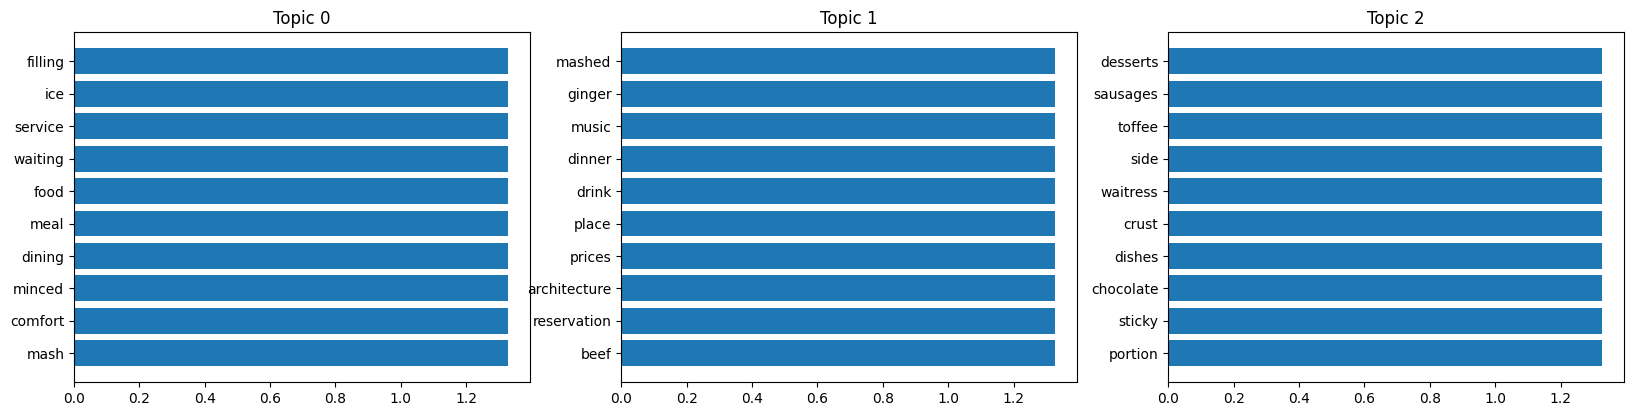

In [283]:
fig = plt.figure(figsize=(20,10))

for key in topic_all.keys():
    plt.subplot(2, 3, key + 1)
    words = [tup[0] for tup in topic_all[key]]
    scores = [tup[1] for tup in topic_all[key]]
    plt.barh(words, scores)
    plt.title(f"Topic {key}")
    

plt.show()

In [303]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
from collections import Counter


In [304]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(aspects)
kmeans = KMeans(n_clusters=3).fit(tfidf)

In [305]:
labels = list(kmeans.labels_)
keys = aspects_ls

In [306]:
# Need for method 

c = {}
for i, l in enumerate(labels):
    if c.get(labels[i]) is None:
        w = []
        w.append(keys[i])
        c[labels[i]] = w
    else:
        w = c.get(labels[i])
        w.append(keys[i])
        c[labels[i]] = w
        
    

In [310]:
# Need for method 
def get_clusters(clusters):
    all_clusters = []
    sent_clust_0 = []
    for fs in clusters[0]:
        for sent in aspects[fs]:
            sent_clust_0.append(sent) 
    all_clusters.append(sent_clust_0)

    sent_clust_1 = []
    for fs in clusters[1]:
        for sent in aspects[fs]:
            sent_clust_1.append(sent) 
            
    all_clusters.append(sent_clust_1)

    sent_clust_2 = []
    for fs in clusters[2]:
        for sent in aspects[fs]:
            sent_clust_2.append(sent)  
            
    all_clusters.append(sent_clust_2)
    
#     sent_clust_3 = []
#     for fs in clusters[3]:
#         for sent in aspects[fs]:
#             sent_clust_3.append(sent)   
#     all_clusters.append(sent_clust_3)
    
#     sent_clust_4 = []
#     for fs in clusters[4]:
#         for sent in aspects[fs]:
#             sent_clust_4.append(sent)  
#     all_clusters.append(sent_clust_4)
    
    return all_clusters



In [311]:
clusters = get_clusters(c)

In [312]:
sent_dfs = []

for cluster in clusters:
    sentiments = Counter()
    for s in cluster:
        sentiments[s] += 1
    sentiments = dict(sentiments)
    sent_dfs.append(sentiments)
        
sent_dfs  

[{'Positive': 45, 'Negative': 5, 'Neutral': 3},
 {'Positive': 1},
 {'Positive': 1}]

In [313]:
df_1 = pd.DataFrame(sent_dfs)


In [314]:
df_1

,Positive,Negative,Neutral
0,45,5.0,3.0
1,1,NaN,NaN
2,1,NaN,NaN
